# Lab 0.5 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [12]:
import pandas as pd
df = pd.read_csv("AveragedDate.csv")

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


1. What is the last entry in your table?

In [13]:
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
df.head(1)
df.tail(1)

,Time,Date,Temp °C,Temp °F,Humidity
527,8:48:05,2025-01-31,22.5,72.5,13.5


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [14]:
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
total = 0
count = 0
column = df["Temp °F"]
for t in column:
    total += t
    count += 1
average = total / count
print(f"Average: {average}")
print(f"Lowest: {column.min()}")
print(f"Highest: {column.max()}")

Average: 71.62164772727274
Lowest: 69.71
Highest: 77.45


3. Create a boxplot of the temperatures.

In [15]:
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
df.boxplot()

<AxesSubplot: title={'center': 'Change in Temp. Over Time'}, xlabel='Time', ylabel='Kelvin'>

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


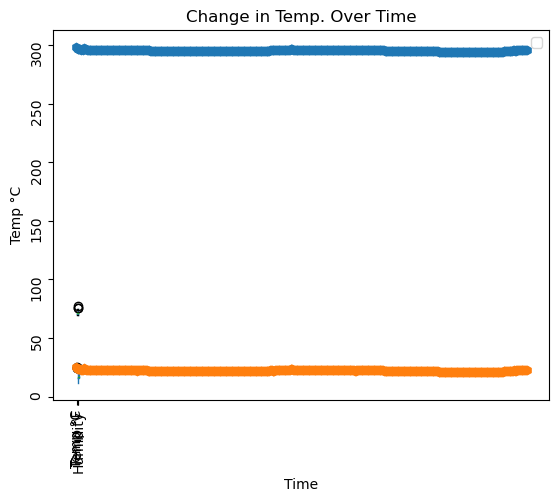

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
plt.plot(df['Time'],df['Temp °C'],marker='h')
plt.xlabel('Time') # labels the x-axis
plt.ylabel('Temp °C') # labels the y-axis
plt.title('Change in Temp. Over Time') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
plt.show()

5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


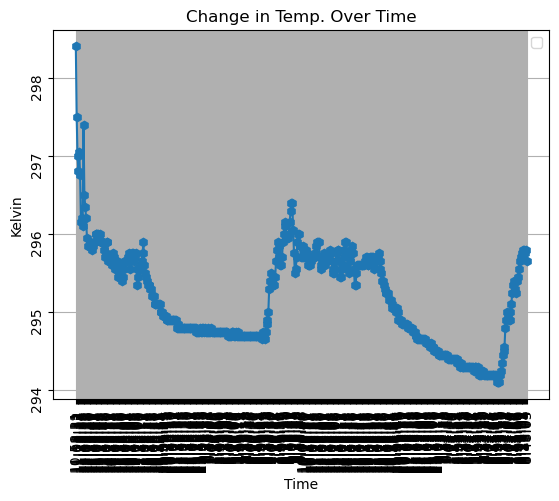

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
kelvin = []
for k in df['Temp °C']:
    k += 273.15
    kelvin.append(k)
plt.plot(df['Time'],kelvin,marker='h')
plt.xlabel('Time') # labels the x-axis
plt.ylabel('Kelvin') # labels the y-axis
plt.title('Change in Temp. Over Time') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
plt.show()

6. Get the record(row) at 2:30PM 


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("AveragedDate.csv")
kelvin = []
for k in df['Temp °C']:
    k += 273.15
    kelvin.append(k)
plt.plot(df['Time'],kelvin,marker='h')
plt.xlabel('Time') # labels the x-axis
plt.ylabel('Kelvin') # labels the y-axis
plt.title('Change in Temp. Over Time') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
df.iloc[14:33:53]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Time,Date,Temp °C,Temp °F,Humidity
14,12:13:39,2025-01-29,22.7,72.86,15.5


# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [19]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")

mat = []

for t in tr:
    lst = [item.strip() for item in t.text.split("\n") if item.strip() != ""] 
    arr = []

    for l in lst:
        try: 
            arr.append(int(l.replace("\xa0", "").replace(",", ""))) 
        except ValueError:
            arr.append(l.strip())  

    if arr:
        arr = arr[:2] + arr[2::2] 
        mat.append(arr)

titles = [str(title) for title in mat[0]]
titles[0] = "countries"  

mat = mat[1:]  

df_a = pd.DataFrame.from_records(mat, columns=titles)

for col in df_a.columns[1:]:
    df_a[col] = pd.to_numeric(df_a[col], errors="coerce") 


1. A 5 number summary of `df_a`

In [20]:
df_a.describe()

,2024,2030,2100
count,2.580000e+02,2.580000e+02,2.580000e+02
mean,1.409838e+08,1.483421e+08,2.564182e+08
std,6.587727e+08,6.906787e+08,1.679245e+09
min,5.260000e+02,5.610000e+02,1.237000e+03
25%,5.999040e+05,6.259820e+05,6.768595e+05
50%,6.893438e+06,7.254900e+06,8.156020e+06
75%,3.483818e+07,3.830878e+07,5.201191e+07
max,8.118836e+09,8.546141e+09,2.290128e+10


2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [21]:
df_a.set_index('countries', inplace=True)

print(df_a)

                                   2024        2030         2100
countries                                                       
World                        8118836000  8546141000  22901278109
Asia                         4785060000  4958807000  12902801109
Africa                       1494994000  1710666000   3924421000
Sub-Saharan Africa           1226534000  1417346000   3442347000
Central Asia and South Asia  2128585000  2258687000   2559659000
...                                 ...         ...          ...
Venezuela                      29395334    32027461     35353213
Vietnam                        99497680   102699905     91036732
Yemen                          35219853    39923245     74176034
Zambia                         21314956    25024901     64473916
Zimbabwe                       16634373    18610348     37166572

[258 rows x 3 columns]


3. What is the largest population listed for 2030?

In [22]:
df_a["2030"].max()

8546141000

4. What was the population of Austria from now to 2100?

In [25]:
#df_a.set_index('countries', inplace=True)
df_a.loc["Austria"]

2024    9120813
2030    9080346
2100    7399328
Name: Austria, dtype: int64

5. What will the population be of France in 2030?

In [30]:
france = df_a.loc["France"]
france["2030"]

65543452

6. What 5 entries will have the highest population in 2100? Display their records.

In [35]:
df_a.sort_values(by="2100", ascending=True)
col = df_a["2100"]
col.head(5)

countries
World                          22901278109
Asia                           12902801109
Africa                          3924421000
Sub-Saharan Africa              3442347000
Central Asia and South Asia     2559659000
Name: 2100, dtype: int64

7. What was country with the smallest population in 2024?

In [38]:
df_a['2024'].min()

526

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

In [ ]:
#data = df_a([austria], [germany], [states], [france], columns=[2024, 2030, 2100])
#print(austria)

print(df_a)

plt.plot(df_a.iloc[''], use_index=True, marker='h')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')
plt.grid()
plt.legend()
plt.show()

                                   2024        2030         2100
countries                                                       
World                        8118836000  8546141000  22901278109
Asia                         4785060000  4958807000  12902801109
Africa                       1494994000  1710666000   3924421000
Sub-Saharan Africa           1226534000  1417346000   3442347000
Central Asia and South Asia  2128585000  2258687000   2559659000
...                                 ...         ...          ...
Venezuela                      29395334    32027461     35353213
Vietnam                        99497680   102699905     91036732
Yemen                          35219853    39923245     74176034
Zambia                         21314956    25024901     64473916
Zimbabwe                       16634373    18610348     37166572

[258 rows x 3 columns]


TypeError: Cannot index by location index with a non-integer key